In [ ]:
# from lecture slides on splitting data

import numpy as np
from sklearn.model_selection import Kfold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)
print(kf)
for train_index, test_index in kf.split(X):
print("TRAIN:", train_index, "TEST:", test_index)
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [ ]:
# from lecture slides on distance calculation
#Importing required libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
#Getting the data ready
data = load_iris()
df = data.data
#Selecting certain features based on which clustering is done
df = df[:,1:3]
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
print(dist.pairwise(df))

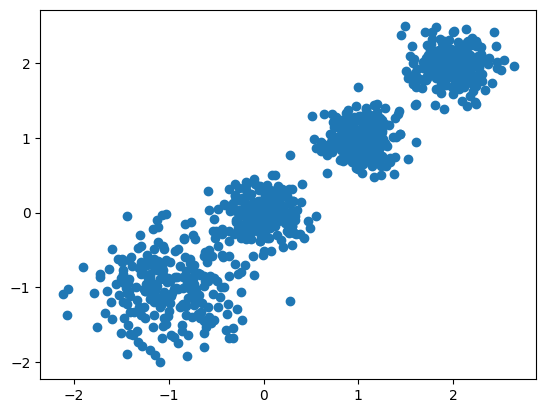

In [ ]:
# from lecture slides on k-means clustering
# generate the experimental data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples = 1000,
                  n_features = 2,
                  centers = [[-1,-1],[0,0],[1,1],[2,2]],
                  cluster_std = [0.4, 0.2, 0.2, 0.2],
                  random_state = 9)

plt.scatter(X[:,0], X[:,1], marker = "o")

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


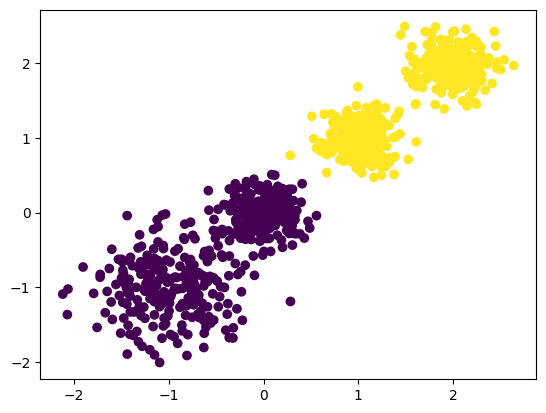

In [ ]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters = 2, random_state = 9).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

In [ ]:
# from lecture slides on agglomerative clustering
#Importing required libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
#Getting the data ready
data = load_iris()
df = data.data
#Selecting certain features based on which clustering is done
df = df[:,1:3]
#Creating the model
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
#predicting the labels
labels = agg_clustering.fit_predict(df)

# print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 1
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 1 1 2 2 1 1 1
 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


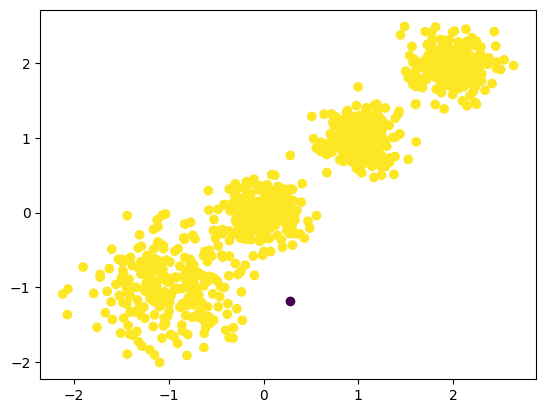

In [ ]:
# from lecture slides on DBSCAN
from sklearn.cluster import DBSCAN
y_pred = DBSCAN().fit_predict(X)
plt.scatter(X[:,0],X[:,1], c = y_pred)
plt.show()

# not sure this is doing what it should - doesn't look like much to me?
# yes that's right - below shows how important it is to get the settings right!

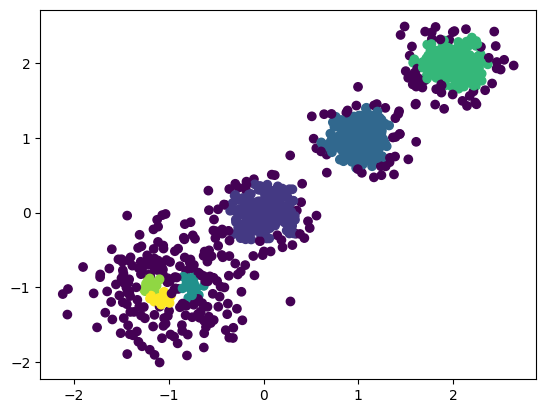

In [ ]:
y_pred = DBSCAN(eps = 0.1, min_samples = 10).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

In [ ]:
# from lecture slides on k nearest neighbour
X = [[0],[1],[2],[3]]
y = [0,0,1,1]

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X,y)

print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))

# n_neighborsint, default=5
# weights{‘uniform’, ‘distance’} or callable, default=’uniform’
# p, int, default=2
# metricstr or callable, default=’minkowski’

# not really sure what's going on here tbh...

[0]
[[0.66666667 0.33333333]]


In [3]:
# from lecture slides on SVM
# linear SVM
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
X, y = make_classification(n_features = 4, random_state = 0)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state = 0, tol = 1e-5))
clf.fit(X, y)

# not really clear what's going on here...

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [12]:
# non linear SVM
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = np.array([[-1,-1],[-2,-1],[1,1],[2,1]])
y = np.array([1,1,2,2])
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma = "auto"))
clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [14]:
# more SVM that I'm confused about...
from sklearn.svm import SVC
# I had to add the Pipeline function as wasn't working without
from sklearn.pipeline import Pipeline

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = 3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X,y)

# but what is this actually doing??

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])